In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

sns.set_theme(style="whitegrid")

In [2]:
df = pd.read_csv("../data/train_new.csv", dtype={"StateHoliday": str})

In [3]:
numeric_feats = ['Store', 'Day', 'Month', 'Year', 'WeekOfYear', 'Promo', 'SchoolHoliday', 'CompetitionDistance', \
    'CompetitionAge', 'Promo2Age', 'Promo2' 
]

categorical_feats = [ 'DayOfWeek','StateHoliday', 'StoreType', 'Assortment']

In [5]:
print(len(df))
df.head()

844392


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,CompetitionAge,Promo2Age,IsPromo2Applied
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,NaN,NaN,NaN,2015,7,31,31,82.0,0.000000,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31,92.0,64.131148,1
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31,103.0,51.901639,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,NaN,NaN,NaN,2015,7,31,31,70.0,0.000000,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,NaN,NaN,NaN,2015,7,31,31,3.0,0.000000,0


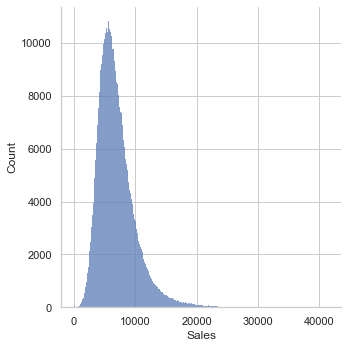

In [5]:
sns.displot(df['Sales'])

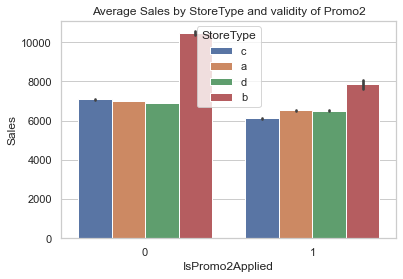

In [25]:
fig = sns.barplot(data=df, x='IsPromo2Applied', y='Sales', hue='StoreType')
fig.set_title("Average Sales by StoreType and validity of Promo2")
plt.show(fig)

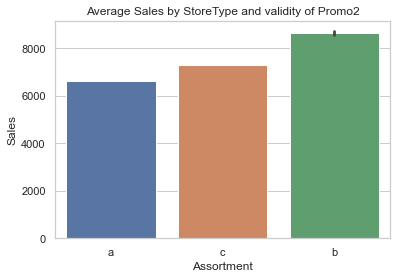

In [4]:
fig = sns.barplot(data=df, x='Assortment', y='Sales')
fig.set_title("Average Sales by StoreType and validity of Promo2")
plt.show(fig)

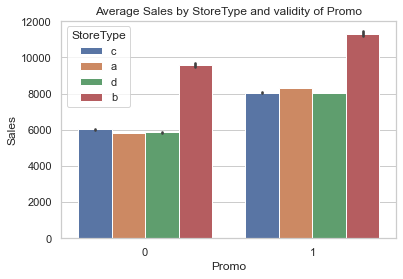

In [7]:
fig = sns.barplot(data=df, x='Promo', y='Sales', hue='StoreType')
fig.set_title("Average Sales by StoreType and validity of Promo")
plt.show(fig)

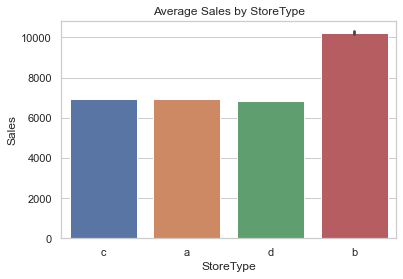

In [8]:
fig = sns.barplot(data=df, x='StoreType', y='Sales')
fig.set_title("Average Sales by StoreType")
plt.show(fig)

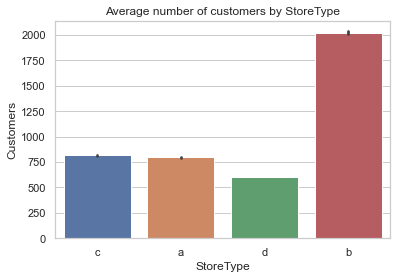

In [9]:
fig = sns.barplot(data=df, x='StoreType', y='Customers')
fig.set_title("Average number of customers by StoreType")
plt.show(fig)

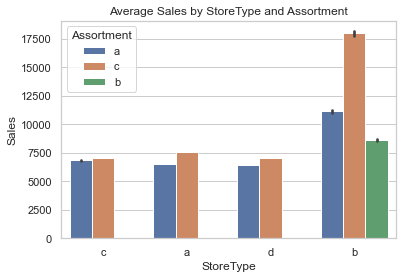

In [10]:
fig = sns.barplot(data=df, x='StoreType', y='Sales', hue="Assortment")
fig.set_title("Average Sales by StoreType and Assortment")
plt.show(fig)

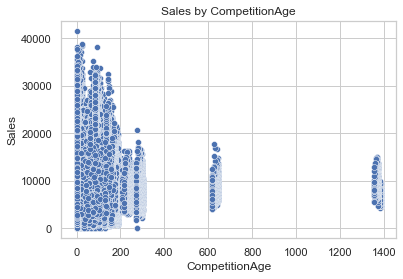

In [11]:
fig = sns.scatterplot(data=df, x='CompetitionAge', y='Sales')
fig.set_title("Sales by CompetitionAge")
plt.show(fig)

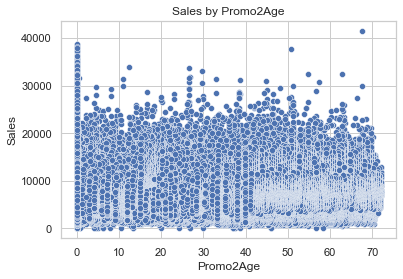

In [12]:
fig = sns.scatterplot(data=df, x='Promo2Age', y='Sales')
fig.set_title("Sales by Promo2Age")
plt.show(fig)

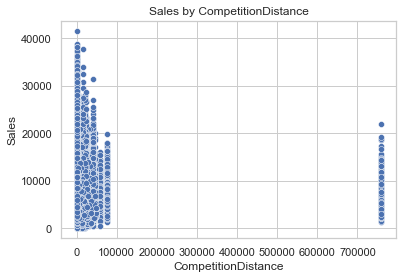

In [13]:
fig = sns.scatterplot(data=df, x='CompetitionDistance', y='Sales')
fig.set_title("Sales by CompetitionDistance")
plt.show(fig)

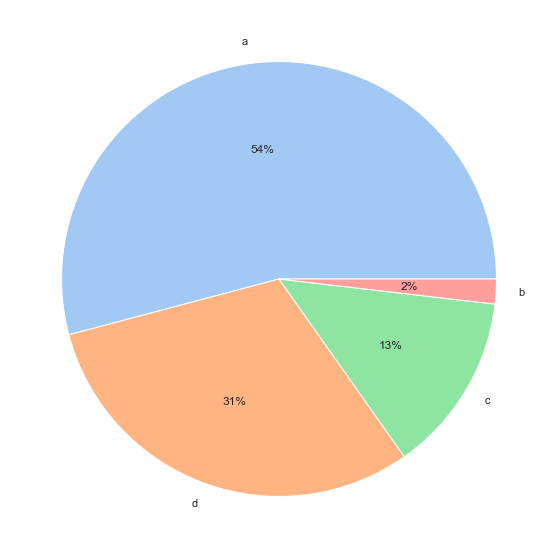

In [34]:
#define data
data=df['StoreType'].value_counts(normalize=True).values.tolist()
labels=df['StoreType'].value_counts(normalize=True).index.tolist()

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:4]

#create pie chart
fig1, ax1 = plt.subplots()
fig1.set_size_inches(10,10) 
ax1.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.rc('figure', titlesize=30)
plt.show()

In [21]:
df_grouped = df.groupby(['Date', 'StoreType'], as_index=False).agg({'Sales': 'mean'})

<AxesSubplot:xlabel='StoreType', ylabel='Sales'>

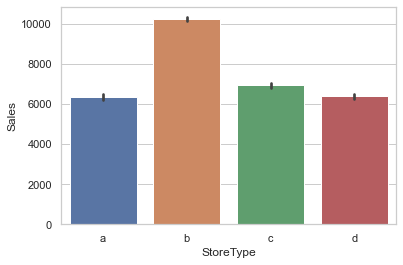

In [24]:
sns.barplot(data=df_grouped, x='StoreType', y='Sales')

In [17]:
df_grouped = df.groupby(['Date', 'StoreType'], as_index=False).agg({'Customers': sum})

In [18]:
df_grouped

,Date,StoreType,Customers
0,2013-01-01,a,532
1,2013-01-01,b,18959
2,2013-01-02,a,491477
3,2013-01-02,b,26412
4,2013-01-02,c,123999
...,...,...,...
3544,2015-07-30,d,219134
3545,2015-07-31,a,544254
3546,2015-07-31,b,38430
3547,2015-07-31,c,136922


<AxesSubplot:xlabel='StoreType', ylabel='Customers'>

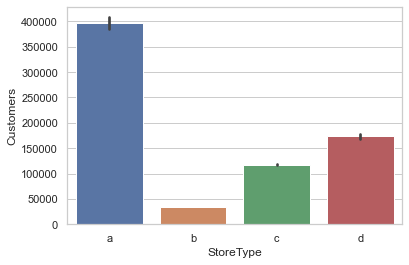

In [19]:
sns.barplot(data=df_grouped, x='StoreType', y='Customers')

In [31]:
len(df[(df['Promo']==0) & (df['IsPromo2Applied']==1)])

68850

In [32]:
len(df)

844392

In [34]:
len(df[(df['Promo']==1) & (df['IsPromo2Applied']==0)])

320014